In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Osservazioni equidistribuite lungo il range misurabile #

### Primo caso: rho = 0.93 applicando metodo Gauss Markov ###

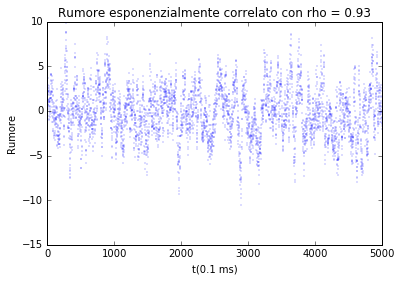

In [94]:
#genero il rumore correlato
theta = 0.0015
deltaT= 0.0001
sigmaWn = 10000    # sigma white noise
sigmaOmega = sqrt(deltaT**2 * sigmaWn**2)
rho = 1 - deltaT/theta
measuresNumber = 5000

u = range(0,measuresNumber)

for i in range (1,measuresNumber):
    wn = random.normal(0, sigmaOmega)
    u[i] = rho * u[i-1] + wn   

u = transpose(u)    #in questo modo ho le dimensioni giuste
plot(u, '.', markersize=0.6)
title("Rumore esponenzialmente correlato con rho = 0.93")
xlabel("t(0.1 ms)")
ylabel("Rumore")
savefig('1.png', bbox_inches='tight') #1
show()

In [95]:
#costruisco la matrice di covarianza Cuu del processo

Cuu = zeros((measuresNumber,measuresNumber))
gamma = sigmaOmega**2 / (1 - rho**2)

for i in range (0,measuresNumber):
    for j in range (0,measuresNumber):
        Cuu[i][j] = rho**abs(i-j) * gamma

In [96]:
# ora il mio scopo è la misura dello scalare beta, tale che y(t)=cost=beta
beta = 10

# faccio le misurazioni y con intervallo di camponamento deltaT
w = transpose(ones(measuresNumber))
y = w * beta + u   #quindi varrà Cyy=Cuu

In [97]:
# ora a partire dalle misurazioni y voglio stimare beta
# applichiamo gauss markov
betaGM = dot(dot(dot(transpose(w), inv(Cuu)), w)**(-1), dot(dot(transpose(w), inv(Cuu)), y))
varBetaGM = dot(dot(transpose(w), inv(Cuu)), w)**(-1) #varianza di beta stimato con gauss markov

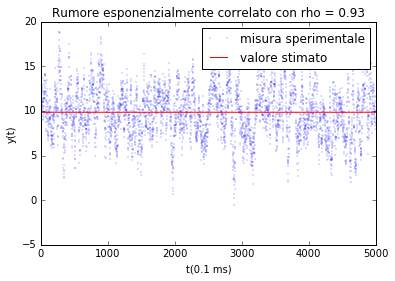

Il valore della costante, stimato con Gauss Markov è: 9.85 +/- 0.21 


In [98]:
betaList = [betaGM] * measuresNumber

plot(y, "b.", markersize=0.6, label="misura sperimentale")
plot(betaList,'r-',label="valore stimato")
title("Rumore esponenzialmente correlato con rho = 0.93")
xlabel("t(0.1 ms)")
ylabel("y(t)")
legend()
savefig('2.png', bbox_inches='tight') #2
show()

print("Il valore della costante, stimato con Gauss Markov è: %s +/- %s " % (str(round(betaGM, 2)), 
                                                                  str(round(abs(sqrt(varBetaGM)), 2))))

### Secondo caso: rho = 0 applicando metodo Gauss Markov ###

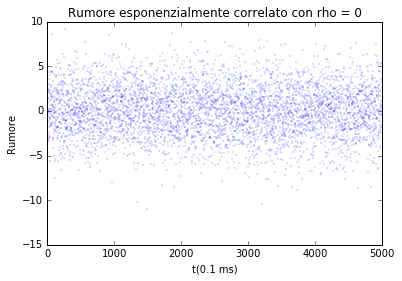

In [152]:
#vediamo ora cosa succede per theta uguale a deltaT
#risulta un rho=0 e perciò Cuu dovrebbe è una matrice diagonale
deltaT= 0.0001
theta2 = deltaT
sigmaWn = 27203
sigmaOmega = sqrt(deltaT**2 * sigmaWn**2)
rho = 1 - deltaT/theta2
measuresNumber = 5000

u = range(0,measuresNumber)
u[0] = 0

for i in range (1,measuresNumber):
    wn = random.normal(0,sigmaOmega)
    u[i] = rho * u[i-1] + wn   

u = transpose(u)
plot(u, '.', markersize=0.6)
title("Rumore esponenzialmente correlato con rho = 0")
xlabel("t(0.1 ms)")
ylabel("Rumore")
savefig('3.png', bbox_inches='tight')   #3
show()

In [153]:
#costruisco la matrice di covarianza Cuu del processo

Cuu = zeros((measuresNumber,measuresNumber))
gamma = sigmaOmega**2 / (1 - rho**2)

for i in range (0,measuresNumber):
    for j in range (0,measuresNumber):
        Cuu[i][j] = rho**abs(i-j) * gamma
        
# ora il mio scopo è la misura dello scalare beta
beta = 10

# faccio le misurazioni y con intervallo di camponamento deltaT
w = transpose(ones(measuresNumber))
y = w * beta + u   #quindi varrà Cyy=Cuu

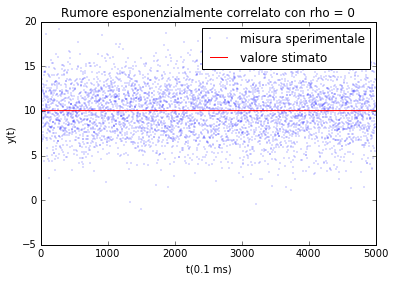

Il valore della costante, stimato con Gauss Markov è: 10.03 +/- 0.04 


In [154]:
# ora a partire dalle misurazioni y voglio stimare beta
# applichiamo gauss markov
betaGM = dot(dot(dot(transpose(w), inv(Cuu)), w)**(-1), dot(dot(transpose(w), inv(Cuu)), y))
varBetaGM = dot(dot(transpose(w), inv(Cuu)), w)**(-1) #varianza di beta stimato con gauss markov

betaList = [betaGM] * measuresNumber
plot(y, "b.", markersize=0.6,label="misura sperimentale")
plot(betaList,'r-',label="valore stimato")
title("Rumore esponenzialmente correlato con rho = 0")
xlabel("t(0.1 ms)")
ylabel("y(t)")
legend()
savefig('4', bbox_inches='tight') #4
show()

print("Il valore della costante, stimato con Gauss Markov è: %s +/- %s " % (str(round(betaGM, 2)), 
                                                                  str(round(abs(sqrt(varBetaGM)), 2))))

### Terzo caso: rho = 0.99 applicando metodo Gauss Markov ###

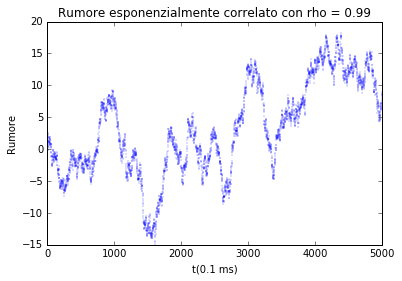

In [155]:
#vediamo ora cosa succede per theta molto maggiore di deltaT
#risulta un rho vicino a 1 e perciò Cuu è piena
deltaT= 0.0001
sigmaWn = 3837 #la cambio per avere valori nello stesso range
theta2 = 0.1
sigmaOmega = sqrt(deltaT**2 * sigmaWn**2)
rho = 1 - deltaT/theta2
gamma = sigmaOmega**2 / (1 - rho**2)

u = range(0,measuresNumber)
u[0] = 0

for i in range (1,measuresNumber):
    wn = random.normal(0,sqrt(deltaT**2 * sigmaWn**2))
    u[i] = rho * u[i-1] + wn   

u = transpose(u)    #in questo modo ho le dimensioni giuste
plot(u, '.', markersize=0.6)
title("Rumore esponenzialmente correlato con rho = 0.99")
xlabel("t(0.1 ms)")
ylabel("Rumore")
savefig('5', bbox_inches='tight') #5
show()

In [156]:
#costruisco la matrice di covarianza Cuu del processo

Cuu = zeros((measuresNumber,measuresNumber))

for i in range (0,measuresNumber):
    for j in range (0,measuresNumber):
        Cuu[i][j] = rho**abs(i-j) * gamma
        
# ora il mio scopo è la misura dello scalare beta
beta = 10

# faccio le misurazioni y con intervallo di camponamento deltaT
w = transpose(ones(measuresNumber))
y = w * beta + u   #quindi varrà Cyy=Cuu

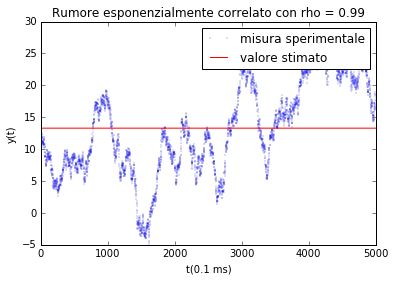

Il valore della costante, stimato con Gauss Markov è: 13.29 +/- 4.59 


In [157]:
# ora a partire dalle misurazioni y voglio stimare beta
# applichiamo gauss markov
betaGM = dot(dot(dot(transpose(w), inv(Cuu)), w)**(-1), dot(dot(transpose(w), inv(Cuu)), y))
varBetaGM = dot(dot(transpose(w), inv(Cuu)), w)**(-1) #varianza di beta stimato con gauss markov

betaList = [betaGM] * measuresNumber
plot(y, "b.", markersize=0.6,label="misura sperimentale")
plot(betaList,'r-',label="valore stimato")
title("Rumore esponenzialmente correlato con rho = 0.99")
xlabel("t(0.1 ms)")
ylabel("y(t)")
legend()
savefig('6', bbox_inches='tight') #6
show()

print("Il valore della costante, stimato con Gauss Markov è: %s +/- %s " % (str(round(betaGM, 2)), 
                                                                  str(round(abs(sqrt(varBetaGM)), 2))))

## Simulazione montecarlo con N prove nel caso in cui rho = 0.93 applicando metodo Gauss Markov ##

In [140]:
from scipy import stats

theta = 0.0015
deltaT= 0.0001
sigmaWn = 10000    # sigma white noise
sigmaOmega = sqrt(deltaT**2 * sigmaWn**2)
rho = 1 - deltaT/theta
measuresNumber = 5000
N = 100  #numero di prove

beta = 10
w = transpose(ones(measuresNumber))

#per prima cosa mi calcolo la varianza di beta stimata con Gauss Markov
#la varianza ovviamente sarà sempre la stessa per ogni prova poichè, le prove sono indipendenti

u = range(0,measuresNumber)
u[0] = 0

for i in range (1,measuresNumber):
    wn = random.normal(0,sigmaOmega)
    u[i] = rho * u[i-1] + wn   

u = transpose(u) 
Cuu = zeros((measuresNumber,measuresNumber))
gamma = sigmaOmega**2 / (1 - rho**2)

for i in range (0,measuresNumber):
    for j in range (0,measuresNumber):
        Cuu[i][j] = rho**abs(i-j) * gamma
    
y = w * beta + u 
varBetaGM = dot(dot(transpose(w), inv(Cuu)), w)**(-1) 

In [141]:
betaGMlist = []

def simulation():
    u = range(0,measuresNumber)
    u[0] = 0

    for i in range (1,measuresNumber):
        wn = random.normal(0,sigmaOmega)
        u[i] = rho * u[i-1] + wn   

    u = transpose(u) 
    Cuu = zeros((measuresNumber,measuresNumber))
    gamma = sigmaOmega**2 / (1 - rho**2)

    for i in range (0,measuresNumber):
        for j in range (0,measuresNumber):
            Cuu[i][j] = rho**abs(i-j) * gamma
    
    y = w * beta + u 
    betaGM = dot(dot(dot(transpose(w), inv(Cuu)), w)**(-1), dot(dot(transpose(w), inv(Cuu)), y))
        
    return betaGMlist.append(betaGM)

In [142]:
%%time

for i in range (0,N):
    simulation()

Wall time: 1h 12min 19s


In [143]:
betaGMmean = mean(betaGMlist)
conf_int = stats.norm.interval(0.95, loc=betaGMmean, scale=sqrt(varBetaGM / N))

print("Il valore di beta, stimato con il metodo Gauss Markov in una simulazione montecarlo è: %s +/- %s \
  con intervallo di confidenza (%s, %s) ed un livello di significatività del 5%% "
      % (str(round(betaGMmean, 2)),
         str(round(sqrt(varBetaGM / N), 2)), 
         str(round(conf_int[0], 2)), 
         str(round(conf_int[1], 2))))    

Il valore di beta, stimato con il metodo Gauss Markov in una simulazione montecarlo è: 10.01 +/- 0.02   con intervallo di confidenza (9.97, 10.05) ed un livello di significatività del 5% 


### Quarto caso: rho = 0 applicando metodo di regressione ###

Parameter's value = 10.04 +/- 0.0 


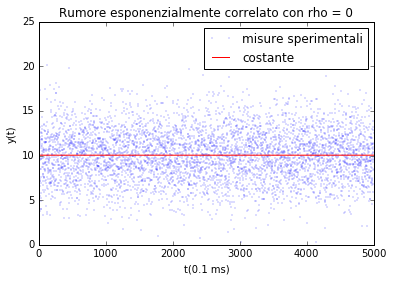

In [39]:
#applico il metodo di regressione, infatti in questo caso il rumore e praticamente non correlato ed il 
#metodo di regressione è adatto
from numpy.polynomial import polynomial as P

#creazione rumore
deltaT= 0.0001
sigmaWn = 27203
sigmaOmega = sqrt(deltaT**2 * sigmaWn**2)
theta2 = deltaT
rho = 1 - deltaT/theta2
gamma = sigmaOmega**2 / (1 - rho**2)
measuresNumber = 5000

u = range(0,measuresNumber)
u[0] = 0

for i in range (1,measuresNumber):
    wn = random.normal(0,sigmaOmega)
    u[i] = rho * u[i-1] + wn   

u = transpose(u)
beta = 10

#applico il modello alle misurazioni
x = arange(measuresNumber) 
w = transpose(ones(measuresNumber))
y = w * beta + u


betaR = P.polyfit(x,y,deg=0)   #beta regression
varBetaR = (measuresNumber * gamma) ** (-1)

print "Parameter's value = %s +/- %s " % (str(round(betaR,2)), str(round(varBetaR,2)))
plot(x, y, '.', markersize=0.6,label="misure sperimentali")
plot (x, [betaR]*measuresNumber, 'r-',label="costante")
title("Rumore esponenzialmente correlato con rho = 0")
xlabel("t(0.1 ms)")
ylabel("y(t)")
legend()
savefig('7.png', bbox_inches='tight') #7
show()
#la comodità di questo metodo è che il calcoli vengono fatti in modo estremamente più veloce

## Simulazione montecarlo con N prove nel caso in cui rho = 0 applicando metodo di regressione ##

In [40]:
#di conseguenza posso fare anche una simulazione monte carlo con questo metodo
#simulazione con N prove:
from numpy.polynomial import polynomial as P
from scipy import stats

theta2 = 0.0002
deltaT= 0.0001
sigmaWn = 27203    # sigma white noise
sigmaOmega = sqrt(deltaT**2 * sigmaWn**2)
rho = 1 - deltaT/theta2
gamma = sigmaOmega**2 / (1 - rho**2)
measuresNumber = 5000
N = 100  #numero di prove

beta = 10
x = arange(measuresNumber)
w = transpose(ones(measuresNumber))
varBetaR = (measuresNumber * gamma) ** (-1)

betaRlist = []     

def simulation2():
    u = range(0,measuresNumber)
    u[0] = 0

    for i in range (1,measuresNumber):
        wn = random.normal(0,sigmaOmega)
        u[i] = rho * u[i-1] + wn   

    u = transpose(u) 
    
    y = w * beta + u
    betaR = P.polyfit(x,y,deg=0)
    
    return betaRlist.append(betaR)

In [41]:
%%time

for i in range (0,N):
    simulation2()

Wall time: 314 ms


In [42]:
betaRmean = mean(betaRlist)
conf_int = stats.norm.interval(0.95, loc=betaRmean, scale=sqrt(varBetaR / N))

print("Il valore di beta, stimato con il metodo Gauss Markov in una simulazione montecarlo è: %s +/- %s \
  con intervallo di confidenza (%s, %s) ed un livello di significatività del 5%% "
      % (str(round(betaRmean, 2)),
         str(round(sqrt(varBetaR / N), 2)), 
         str(round(conf_int[0], 2)), 
         str(round(conf_int[1], 2))))   

Il valore di beta, stimato con il metodo Gauss Markov in una simulazione montecarlo è: 10.02 +/- 0.0   con intervallo di confidenza (10.02, 10.02) ed un livello di significatività del 5% 


Nella simulazione il tempo di calcolo applicando il metodo Gauss Markov è : 1h 12min 19s 

Mentre applicando il metodo di regressione il tempo di calcolo è: 314 ms


PERCIO' PER DATI POCO CORRELATI IL METODO PIU' CONVENIENTE DAL PUNTO DI VISTA COMPUTAZIONALE E' QUELLO DI REGRESSIONE!

## Studio incertezza di stima variando tempo di campionamento, con rho=0.93##

In [200]:
from scipy import stats

theta = 0.0015
sigmaWn = 10000 
rho = 0.93
measuresNumber = 5000
deltaTlist = [1/1000.0, 1/500.0, 1/10.0, 1/5.0, 9/10.0, 11/10.0, 5, 10, 500, 1000]
deltaTlist = [i * theta for i in deltaTlist]

beta = 10
w = transpose(ones(measuresNumber))

In [202]:
varBetaGMlist = []

def simulation(t):
    sigmaOmega = sqrt(t**2 * sigmaWn**2)
    u = range(0,measuresNumber)
    u[0] = 0

    for i in range (1,measuresNumber):
        wn = random.normal(0,sigmaOmega)
        u[i] = rho * u[i-1] + wn   

    u = transpose(u) 
    Cuu = zeros((measuresNumber,measuresNumber))
    gamma = sigmaOmega**2 / (1 - rho**2)

    for i in range (0,measuresNumber):
        for j in range (0,measuresNumber):
            Cuu[i][j] = rho**abs(i-j) * gamma
    
    varBetaGM = dot(dot(transpose(w), inv(Cuu)), w)**(-1) 
        
    return varBetaGMlist.append(varBetaGM)

In [203]:
%%time

for i in deltaTlist:
    simulation(i)

Wall time: 5min 19s


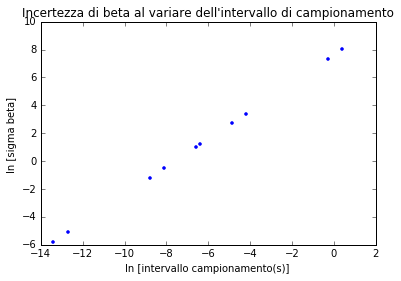

In [216]:
sigmaBetaGMlistP = [log(sqrt(i)) for i in varBetaGMlist] #per avere la deviazione standard e l'asse y 
                                                         #in scala logaritmica
deltaTlistP = [log(i) for i in deltaTlist]  #per avere l'asse x in scala logaritmica

plot(deltaTlistP, sigmaBetaGMlistP, "b.")
title("Incertezza di beta al variare dell'intervallo di campionamento")
xlabel("ln [intervallo campionamento(s)] ")
ylabel("ln [sigma beta] ")
savefig('20.png', bbox_inches='tight') #20
show()

# Osservazioni concentrate all'inizio ed al termine del range misurabile #

### Primo caso: rho = 0.93 applicando metodo Gauss Markov ###

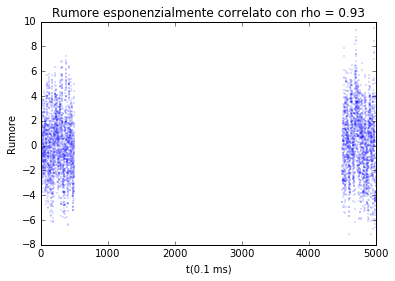

In [263]:
#genero il rumore correlato

theta = 0.3
deltaT= 0.0001 #secondi
sigmaWn = 10000    # sigma white noise
sigmaOmega = sqrt(deltaT**2 * sigmaWn**2)
measuresNumber = 5000
timeRange = deltaT * measuresNumber #range misurabile 

#concentro le misure all'inizio, quindi da 0 a timeRange/10 
#e alla fine, quindi da 9/10 * timeRange a timeRange
deltaT2 = (timeRange/10) / int(measuresNumber/2)
deltaT3 = (timeRange/10.0) * 8 #tempo in cui non vengono effettuate misurazioni
timeSteps = range(0,measuresNumber)

for i in range(1,int(measuresNumber/2)):
    timeSteps[i] = timeSteps[i-1] + deltaT2
    
timeSteps[int(measuresNumber/2)] = (9/10.0 * timeRange)

for i in range(1+int(measuresNumber/2), measuresNumber):
    timeSteps[i] = timeSteps[i-1] + deltaT2
    
timeSteps = [i * 10000 for i in timeSteps]   #riporto tutto in deicimi di millisecondo 
rho = 0.93
rho2 = 1 - deltaT3/theta

u = range(0,measuresNumber)

for i in range (1,int(measuresNumber/2)):
    wn = random.normal(0,sigmaOmega)
    u[i] = rho * u[i-1] + wn 
    
u[int(measuresNumber/2)] = rho2 * u[int(measuresNumber/2)-1] +  random.normal(0,sigmaOmega)

for i in range (1 + int(measuresNumber/2), measuresNumber):
    wn = random.normal(0,sigmaOmega)
    u[i] = rho * u[i-1] + wn   

u = transpose(u)    #in questo modo ho le dimensioni giuste
plot(timeSteps, u, '.', markersize=0.6)
title("Rumore esponenzialmente correlato con rho = 0.93")
xlabel("t(0.1 ms)")
ylabel("Rumore")
savefig('8.png', bbox_inches='tight')  #8
show()

In [266]:
#costruisco la matrice di covarianza Cuu del processo

Cuu = zeros((measuresNumber,measuresNumber))
gamma = sigmaOmega**2 / (1 - rho**2)
gamma2 = sigmaOmega**2 / (1 - rho2**2)

for i in range (0,measuresNumber):
    for j in range (0,measuresNumber):
        Cuu[i][j] = rho**abs(i-j) * gamma

Cuu[int(measuresNumber/2)-1][int(measuresNumber/2)] = rho2 * gamma2
Cuu[int(measuresNumber/2)][int(measuresNumber/2)-1] = rho2 * gamma2
Cuu[int(measuresNumber/2)][int(measuresNumber/2)] = gamma2

In [267]:
# ora il mio scopo è la misura dello scalare beta, tale che y(t)=cost=beta
beta = 10

# faccio le misurazioni y con intervallo di camponamento deltaT
w = transpose(ones(measuresNumber))
y = w * beta + u   #quindi varrà Cyy=Cuu

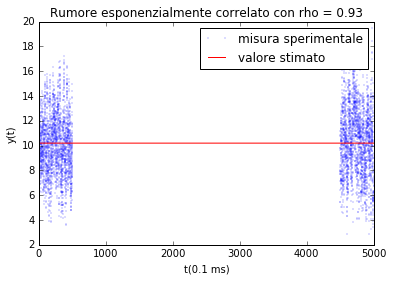

In [268]:
# ora a partire dalle misurazioni y voglio stimare beta
# applichiamo gauss markov
betaGM = dot(dot(dot(transpose(w), inv(Cuu)), w)**(-1), dot(dot(transpose(w), inv(Cuu)), y))
varBetaGM = dot(dot(transpose(w), inv(Cuu)), w)**(-1) #varianza di beta stimato con gauss markov

betaList = [betaGM] * measuresNumber

plot(timeSteps, y, "b.", markersize=0.6, label="misura sperimentale")
plot(betaList,'r-',label="valore stimato")
title("Rumore esponenzialmente correlato con rho = 0.93")
xlabel("t(0.1 ms)")
ylabel("y(t)")
legend()
savefig('9.png', bbox_inches='tight') #9
show()

In [269]:
print("Il valore della costante, stimato con Gauss Markov è: %s +/- %s " % (str(round(betaGM, 2)), 
                                                                  str(round(abs(sqrt(varBetaGM)), 2))))

Il valore della costante, stimato con Gauss Markov è: 10.2 +/- 0.2 


## Simulazione montecarlo con N prove nel caso in cui rho = 0.93 applicando metodo Gauss Markov ##

In [270]:
from scipy import stats

theta = 0.3
deltaT= 0.0001
sigmaWn = 10000    # sigma white noise
sigmaOmega = sqrt(deltaT**2 * sigmaWn**2)
timeRange = deltaT * measuresNumber #range misurabile
measuresNumber = 5000
N = 100  #numero di prove

beta = 10
w = transpose(ones(measuresNumber))

#concentro le misure all'inizio, quindi da 0 a timeRange/10 
#e alla fine, quindi da 9/10 * timeRange a timeRange
deltaT2 = (timeRange/10) / int(measuresNumber/2)
deltaT3 = (timeRange/10.0) * 8
timeSteps = range(0,measuresNumber)

for i in range(1,int(measuresNumber/2)):
    timeSteps[i] = timeSteps[i-1] + deltaT2
    
timeSteps[int(measuresNumber/2)] = (9/10.0 * timeRange)

for i in range(1+int(measuresNumber/2), measuresNumber):
    timeSteps[i] = timeSteps[i-1] + deltaT2
    
timeSteps = [i * 10000 for i in timeSteps]   #riporto tutto in deicimi di millisecondo 
rho = 0.93
rho2 = 1 - deltaT3/theta

#per prima cosa mi calcolo la varianza di beta stimata con Gauss Markov
#la varianza ovviamente sarà sempre la stessa per ogni prova poichè, le prove sono indipendenti

u = range(0,measuresNumber)

for i in range (1,int(measuresNumber/2)):
    wn = random.normal(0,sigmaOmega)
    u[i] = rho * u[i-1] + wn 
    
u[int(measuresNumber/2)] = rho2 * u[int(measuresNumber/2)-1] +  random.normal(0,sigmaOmega)

for i in range (1 + int(measuresNumber/2), measuresNumber):
    wn = random.normal(0,sigmaOmega)
    u[i] = rho * u[i-1] + wn 

u = transpose(u) 
Cuu = zeros((measuresNumber,measuresNumber))
gamma = sigmaOmega**2 / (1 - rho**2)
gamma2 = sigmaOmega**2 / (1 - rho2**2)

for i in range (0,measuresNumber):
    for j in range (0,measuresNumber):
        Cuu[i][j] = rho**abs(i-j) * gamma
        
Cuu[int(measuresNumber/2)-1][int(measuresNumber/2)] = rho2 * gamma2
Cuu[int(measuresNumber/2)][int(measuresNumber/2)-1] = rho2 * gamma2
Cuu[int(measuresNumber/2)][int(measuresNumber/2)] = gamma2
    
y = w * beta + u 
varBetaGM = dot(dot(transpose(w), inv(Cuu)), w)**(-1) 

In [272]:
betaGMlist = []

def simulation():
    u = range(0,measuresNumber)
    u[0] = 0

    for i in range (1,int(measuresNumber/2)):
        wn = random.normal(0,sigmaOmega)
        u[i] = rho * u[i-1] + wn 
    
    u[int(measuresNumber/2)] = rho2 * u[int(measuresNumber/2)-1] +  random.normal(0,sigmaOmega)

    for i in range (1 + int(measuresNumber/2), measuresNumber):
        wn = random.normal(0,sigmaOmega)
        u[i] = rho * u[i-1] + wn   

    u = transpose(u) 
    Cuu = zeros((measuresNumber,measuresNumber))
    gamma = sigmaOmega**2 / (1 - rho**2)
    gamma2 = sigmaOmega**2 / (1 - rho2**2)

    for i in range (0,measuresNumber):
        for j in range (0,measuresNumber):
            Cuu[i][j] = rho**abs(i-j) * gamma
        
    Cuu[int(measuresNumber/2)-1][int(measuresNumber/2)] = rho2 * gamma2
    Cuu[int(measuresNumber/2)][int(measuresNumber/2)-1] = rho2 * gamma2
    Cuu[int(measuresNumber/2)][int(measuresNumber/2)] = gamma2
    
    y = w * beta + u 
    betaGM = dot(dot(dot(transpose(w), inv(Cuu)), w)**(-1), dot(dot(transpose(w), inv(Cuu)), y))
        
    return betaGMlist.append(betaGM)

In [273]:
%%time

for i in range (0,N):
    simulation()

Wall time: 1h 12min 2s


In [274]:
betaGMmean = mean(betaGMlist)
conf_int = stats.norm.interval(0.95, loc=betaGMmean, scale=sqrt(varBetaGM / N))

print("Il valore di beta, stimato con il metodo Gauss Markov in una simulazione montecarlo è: %s +/- %s \
  con intervallo di confidenza (%s, %s) ed un livello di significatività del 5%% "
      % (str(round(betaGMmean, 2)),
         str(round(sqrt(varBetaGM / N), 2)), 
         str(round(conf_int[0], 2)), 
         str(round(conf_int[1], 2)))) 

Il valore di beta, stimato con il metodo Gauss Markov in una simulazione montecarlo è: 10.03 +/- 0.02   con intervallo di confidenza (9.99, 10.07) ed un livello di significatività del 5% 
